# Monte Carlo simulation for the Brazilian Championship

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings('ignore')

In [143]:
df_original = pd.read_csv('brazilian_championship.csv')
df_original.head()

,YEAR,ROUND,day_month,team_wiki_HOME,team_name_HOME,team_nick_HOME,team_state_HOME,result,team_wiki_VISITOR,team_name_VISITOR,team_nick_VISITOR,team_state_VISITOR,stadium_name,stadium_nick,stadium_city,hour,goals_home_time,goals_visitor_time,audience,income
0,2015,Vigésima rodada,22 de agosto,/wiki/Santos_Futebol_Clube,Santos Futebol Clube,Santos,São Paulo,5 – 2,/wiki/Ava%C3%AD_Futebol_Clube,Avaí Futebol Clube,Avaí,Santa Catarina,Estádio Urbano Caldeira,Estádio Vila Belmiro,Santos,18:30,"['10', '12', '47', '80', '90+2\xa0(pen)']","['28', '82']",12036,R$ 289.880.00
1,2015,Vigésima rodada,22 de agosto,/wiki/Goi%C3%A1s_Esporte_Clube,Goiás Esporte Clube,Goiás,Goiás,3 – 0,/wiki/Club_de_Regatas_Vasco_da_Gama,Club de Regatas Vasco da Gama,Vasco da Gama,Rio de Janeiro,Estádio Serra Dourada,Estádio Serra Dourada,Goiânia,18:30,"['4', '16\xa0(pen)', '76\xa0(pen)']",[],11177,R$ 267.895.00
2,2015,Vigésima rodada,22 de agosto,/wiki/Figueirense_Futebol_Clube,Figueirense Futebol Clube,Figueirense,Santa Catarina,2 – 1,/wiki/Sport_Club_do_Recife,Sport Club do Recife,Sport,Pernambuco,Estádio Orlando Scarpelli,Estádio Orlando Scarpelli,Florianópolis,21:00,"['62', '69']",['31'],4879,R$ 62.130.00
3,2015,Vigésima rodada,23 de agosto,/wiki/Coritiba_Foot_Ball_Club,Coritiba Foot Ball Club,Coritiba,Paraná,1 – 0,/wiki/Associa%C3%A7%C3%A3o_Chapecoense_de_Futebol,Associação Chapecoense de Futebol,Chapecoense,Santa Catarina,Estádio Major Antônio Couto Pereira,Estádio Couto Pereira,Curitiba,11:00,['23'],[],21114,R$ 397.145.00
4,2015,Vigésima rodada,23 de agosto,/wiki/Associa%C3%A7%C3%A3o_Atl%C3%A9tica_Ponte...,Associação Atlética Ponte Preta,Ponte Preta,São Paulo,0 – 0,/wiki/Gr%C3%AAmio_Foot-Ball_Porto_Alegrense,Grêmio Foot-Ball Porto Alegrense,Grêmio,Rio Grande do Sul,Estádio Moisés Lucarelli,Estádio Moisés Lucarelli,Campinas,11:00,[],[],8612,R$ 145.880.00


### Selecting columns and splitting the result into two columns

In [3]:
df = df_original[["ROUND","YEAR", "team_nick_HOME", "team_nick_VISITOR", "result"]]
new = df["result"].str.split("–", expand=True)
df["home_goals"] = [int(i.strip()) if str.isalnum(i.strip()) else -1 for i in new[0]]
df["visitor_goals"] = [int(i.strip()) if str.isalnum(i.strip()) else -1 for i in new[1]]
df.drop(["result"], axis=1, inplace=True)
df.sort_values(by="YEAR").head()

,ROUND,YEAR,team_nick_HOME,team_nick_VISITOR,home_goals,visitor_goals
4119,Rodada 32,2008,Figueirense,Fluminense,0,1
3318,Rodada 15,2008,Atlético Paranaense,Figueirense,0,0
3319,Rodada 15,2008,São Paulo,Portuguesa,3,1
3320,Rodada 15,2008,Atlético Mineiro,Vitória,2,1
3321,Rodada 15,2008,Flamengo,Botafogo,0,0


### Transform the ordinal values in the ROUND column in cardinal numbers

In [4]:
df["ROUND"] = df["ROUND"].str.lower().str.replace("rodada", "").str.strip()

# ordinal values
uni = ["","primeira", "segunda", "terceira", "quarta", "quinta",
       "sexta", "sétima", "oitava", "nona"]

dec = ["", "décima", "vigésima", "trigésima"] 

#associate ordinal values with cardinal values 
vals = []
count = 0

for d in dec:
    for u in uni:    
        vals.append([f"{d} {u}".strip(), count])
        count += 1

vals.pop(0)
print("vals: \n", vals)

# replace values in the dataframe
for v in vals:
    df.loc[df["ROUND"] == v[0], "ROUND"] = v[1]
    
# show the results
df.sort_values(by="YEAR").head()


vals: 
 [['primeira', 1], ['segunda', 2], ['terceira', 3], ['quarta', 4], ['quinta', 5], ['sexta', 6], ['sétima', 7], ['oitava', 8], ['nona', 9], ['décima', 10], ['décima primeira', 11], ['décima segunda', 12], ['décima terceira', 13], ['décima quarta', 14], ['décima quinta', 15], ['décima sexta', 16], ['décima sétima', 17], ['décima oitava', 18], ['décima nona', 19], ['vigésima', 20], ['vigésima primeira', 21], ['vigésima segunda', 22], ['vigésima terceira', 23], ['vigésima quarta', 24], ['vigésima quinta', 25], ['vigésima sexta', 26], ['vigésima sétima', 27], ['vigésima oitava', 28], ['vigésima nona', 29], ['trigésima', 30], ['trigésima primeira', 31], ['trigésima segunda', 32], ['trigésima terceira', 33], ['trigésima quarta', 34], ['trigésima quinta', 35], ['trigésima sexta', 36], ['trigésima sétima', 37], ['trigésima oitava', 38], ['trigésima nona', 39]]


,ROUND,YEAR,team_nick_HOME,team_nick_VISITOR,home_goals,visitor_goals
4119,32,2008,Figueirense,Fluminense,0,1
3318,15,2008,Atlético Paranaense,Figueirense,0,0
3319,15,2008,São Paulo,Portuguesa,3,1
3320,15,2008,Atlético Mineiro,Vitória,2,1
3321,15,2008,Flamengo,Botafogo,0,0


### Summarize result by year

In [5]:
def add_match_points(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    home_conditions = [(df["home_goals"] > df["visitor_goals"]),
                       (df["home_goals"] < df["visitor_goals"]),]

    visitor_conditions = [(df["home_goals"] < df["visitor_goals"]),
                          (df["home_goals"] > df["visitor_goals"]),]

    choices = [3, 0]

    df["home_points"] = np.select(home_conditions, choices, default=1)
    df["visitor_points"] = np.select(visitor_conditions, choices, default=1)
    
    return df

def unique_teams(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    teams = pd.DataFrame({"teams": list(set(df["team_nick_HOME"].tolist() 
                                            + df["team_nick_VISITOR"].tolist()))})
    return teams

def add_goals(df: pd.core.frame.DataFrame, teams: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    teams["goals_for"] = [sum(df[df["team_nick_HOME"]==i]["home_goals"]) 
                            for i in teams["teams"]]
    teams["goals_for"] += [sum(df[df["team_nick_VISITOR"]==i]["visitor_goals"]) 
                             for i in teams["teams"]]

    teams["goals_against"] = [sum(df[df["team_nick_HOME"]==i]["visitor_goals"]) 
                              for i in teams["teams"]]
    teams["goals_against"] += [sum(df[df["team_nick_VISITOR"]==i]["home_goals"]) 
                               for i in teams["teams"]]
    teams["goals_difference"] = teams["goals_for"] - teams["goals_against"]
    
    return teams

def add_win_draw_loss(df: pd.core.frame.DataFrame, teams: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    teams["win"] = [len(df[(df["team_nick_HOME"]==i) & (df["home_points"]==3)]) 
                 for i in teams["teams"]]
    teams["win"] += [len(df[(df["team_nick_VISITOR"]==i) & (df["visitor_points"]==3)]) 
                  for i in teams["teams"]]

    teams["draw"] = [len(df[(df["team_nick_HOME"]==i) & (df["home_points"]==1)]) 
                  for i in teams["teams"]]
    teams["draw"] += [len(df[(df["team_nick_VISITOR"]==i) & (df["visitor_points"]==1)]) 
                   for i in teams["teams"]]

    teams["loss"] = [len(df[(df["team_nick_HOME"]==i) & (df["home_points"]==0)]) 
                  for i in teams["teams"]]
    teams["loss"] += [len(df[(df["team_nick_VISITOR"]==i) & (df["visitor_points"]==0)]) 
                   for i in teams["teams"]]
    return teams
    
def add_points(df: pd.core.frame.DataFrame, teams: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    teams["points"] = [sum(df[df["team_nick_HOME"]==i]["home_points"]) 
                    for i in teams["teams"]]
    teams["points"] += [sum(df[df["team_nick_VISITOR"]==i]["visitor_points"]) 
                     for i in teams["teams"]]
    return teams

    
def summarize_by_year(dataframe: pd.core.frame.DataFrame, year: int) -> pd.core.frame.DataFrame:
    df = dataframe[dataframe["YEAR"] == year] 
    df = add_match_points(df)
    
    teams = unique_teams(df)
    teams = add_win_draw_loss(df, teams)
    teams = add_goals(df, teams)
    teams = add_points(df, teams)
    
    return teams

summarize_by_year(df, 2018).sort_index(by="points", ascending=False)   


,teams,win,draw,loss,goals_for,goals_against,goals_difference,points
16,Palmeiras,23,11,4,64,26,38,80
5,Flamengo,21,9,8,59,29,30,72
12,Internacional,19,12,7,51,29,22,69
18,Grêmio,18,12,8,48,27,21,66
2,São Paulo,16,15,7,46,34,12,63
6,Atlético Mineiro,17,8,13,56,43,13,59
14,Atlético Paranaense,16,9,13,54,37,17,57
10,Cruzeiro,14,11,13,34,34,0,53
4,Botafogo,13,12,13,38,46,-8,51
3,Santos,13,11,14,46,40,6,50


### Original Data from 2018

<img src="https://raw.githubusercontent.com/AvsThiago/brasileirao-scraping/master/tabela2018-1.jpg" width=500>


### Finding the TOP20 teams that participated the most in the last eleven years

In [6]:
# Deal with one team two names
df.loc[df["team_nick_HOME"]=="Atlético Paranaense", ["team_nick_HOME"]] = "Atlético-PR"
df.loc[df["team_nick_VISITOR"]=="Atlético Paranaense", ["team_nick_VISITOR"]] = "Atlético-PR"
# all teams who ever participated
all_teams = unique_teams(df).sort_index(by="teams")
# check if each team participated each year
all_teams_participations = [[t, i, df[((df["team_nick_HOME"]==t) & (df["YEAR"]==i)) | 
                                      ((df["team_nick_VISITOR"]==t) & (df["YEAR"]==i))].size > 0] 
                            for t in all_teams["teams"] 
                            for i in range(2008, 2019)]

all_teams_participations = pd.DataFrame(all_teams_participations, 
                                        columns=["team", "year", "participation"])

all_teams_participations = all_teams_participations.groupby(["team"], as_index=False)["participation"].sum()

all_teams_participations = all_teams_participations.sort_index(by=["participation", "team"], 
                                                               ascending=[False, True])[:20]

print(all_teams_participations)

                team  participation
2   Atlético Mineiro           11.0
14          Cruzeiro           11.0
16          Flamengo           11.0
17        Fluminense           11.0
19            Grêmio           11.0
33            Santos           11.0
35         São Paulo           11.0
4        Atlético-PR           10.0
8           Botafogo           10.0
11       Corinthians           10.0
23     Internacional           10.0
27         Palmeiras           10.0
12          Coritiba            9.0
34             Sport            8.0
36     Vasco da Gama            8.0
37           Vitória            8.0
6              Bahia            6.0
15       Figueirense            6.0
18             Goiás            6.0
5               Avaí            5.0


### Create categorical distribuitions of how many goals each team scored as host or visitor

               team                                          home_dist  \
0  Atlético Mineiro  <scipy.stats._distn_infrastructure.rv_sample o...   
1          Cruzeiro  <scipy.stats._distn_infrastructure.rv_sample o...   
2          Flamengo  <scipy.stats._distn_infrastructure.rv_sample o...   
3        Fluminense  <scipy.stats._distn_infrastructure.rv_sample o...   
4            Grêmio  <scipy.stats._distn_infrastructure.rv_sample o...   

                                          visit_dist  
0  <scipy.stats._distn_infrastructure.rv_sample o...  
1  <scipy.stats._distn_infrastructure.rv_sample o...  
2  <scipy.stats._distn_infrastructure.rv_sample o...  
3  <scipy.stats._distn_infrastructure.rv_sample o...  
4  <scipy.stats._distn_infrastructure.rv_sample o...  


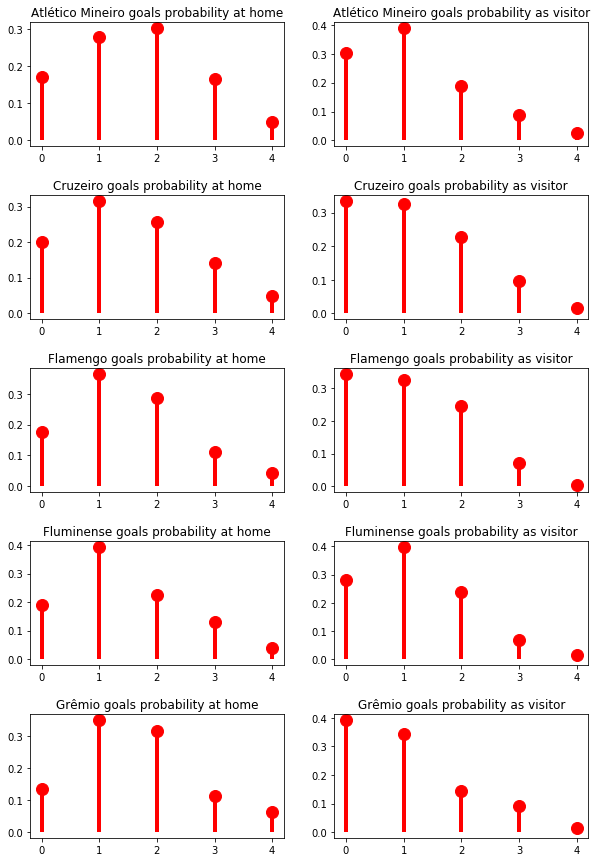

In [7]:
from scipy.stats import rv_discrete

teams_dist = []

for t in all_teams_participations["team"]:
    df_host = df.loc[df["team_nick_HOME"]==t, ["team_nick_HOME", "home_goals"]]
    goals_host_prob = pd.DataFrame({'probability': 
                                    df_host.groupby(by="home_goals", 
                                                    as_index=False).size() / 
                                                    df_host.home_goals.count()}).reset_index()
    values_h = goals_host_prob.home_goals
    probabilities_h = goals_host_prob.probability

    df_visitor = df.loc[df["team_nick_VISITOR"]==t, ["team_nick_VISITOR", "visitor_goals"]]
    goals_visit_prob = pd.DataFrame({'probability': 
                                     df_visitor.groupby(by="visitor_goals", 
                                                        as_index=False).size() / 
                                                        df_visitor.visitor_goals.count()}).reset_index()                        
    values_v = goals_visit_prob.visitor_goals
    probabilities_v = goals_visit_prob.probability

    teams_dist.append([t, rv_discrete(values=(values_h, probabilities_h)),
                       rv_discrete(values=(values_v, probabilities_v))])

teams_dist = pd.DataFrame(teams_dist, columns=["team", "home_dist", "visit_dist"])
# five team distribuitions
print(teams_dist[:5])

x = np.arange(5)
_, ax = plt.subplots(5, 2, figsize=(10,15))
plt.subplots_adjust(hspace=.4)
for i, d in teams_dist[:5].iterrows():
    #print(y["home_dist"])
    ax[i, 0].plot(x, d["home_dist"].pmf(x), 'ro', ms=12, mec='r')
    ax[i, 0].vlines(x, 0, d["home_dist"].pmf(x), colors='r', lw=4)
    ax[i, 0].set_title(f'{d["team"].title()} goals probability at home', fontsize=12)
    ax[i, 1].plot(x, d["visit_dist"].pmf(x), 'ro', ms=12, mec='r')
    ax[i, 1].vlines(x, 0, d["visit_dist"].pmf(x), colors='r', lw=4)
    ax[i, 1].set_title(f'{d["team"].title()} goals probability as visitor', fontsize=12)
plt.show()

### Generating some randon games

In [75]:
def generate_game(team1, team2):
    t1_score = teams_dist.loc[teams_dist["team"]==team1, ["home_dist"]].values[0][0].rvs()
    t2_score = teams_dist.loc[teams_dist["team"]==team2, ["visit_dist"]].values[0][0].rvs()
    return f"{team1} {t1_score}-{t2_score} {team2}", [t1_score, t2_score]

top20_teams = teams_dist["team"].tolist()
for i in range(5):
    result = generate_game(*random.sample(top20_teams, 2))
    print(result[0])

Figueirense 3-2 Cruzeiro
Fluminense 1-2 São Paulo
Grêmio 2-2 Flamengo
Internacional 3-2 Coritiba
Figueirense 0-2 São Paulo


### Extract championchip structure to simulate future results

In [54]:
# select the structure from some year
structure = df.loc[df["YEAR"] == 2018, ["team_nick_HOME", "team_nick_VISITOR"]].reset_index().drop("index", 1)

print(structure[:11], "\n...")

# empty the structure
unique = [(i, t) for i, t in enumerate(unique_teams(structure)["teams"].tolist())]
for i, t in unique:
    structure.loc[structure["team_nick_HOME"] == t, ["team_nick_HOME"]] = i
    structure.loc[structure["team_nick_VISITOR"] == t, ["team_nick_VISITOR"]] = i

print(structure[:11], "\n...")

      team_nick_HOME team_nick_VISITOR
0              Ceará            Santos
1              Bahia     Internacional
2             Paraná         São Paulo
3          Palmeiras          Botafogo
4              Sport   América Mineiro
5         Fluminense       Corinthians
6             Grêmio          Cruzeiro
7           Flamengo           Vitória
8   Atlético Mineiro     Vasco da Gama
9        Chapecoense       Atlético-PR
10            Santos             Bahia 
...
    team_nick_HOME  team_nick_VISITOR
0               12                  3
1               15                 13
2                0                  2
3               16                  4
4               19                  1
5               17                  9
6               18                 10
7                5                 11
8                6                 14
9                7                  8
10               3                 15 
...


### Simulate Championship

In [140]:
def simulate_championship(year: str, teams: list, structure):
    random.shuffle(teams)
    positions = list(range(len(teams)))
    for t, p in zip(teams, positions):
        structure.loc[structure["team_nick_HOME"] == p, ["team_nick_HOME"]] = t
        structure.loc[structure["team_nick_VISITOR"] == p, ["team_nick_VISITOR"]] = t
    results = []
    for j, i in structure.iterrows():
        results.append(generate_game(i["team_nick_HOME"], i["team_nick_VISITOR"])[1])
    structure["YEAR"] = year
    structure["home_goals"] = [i[0] for i in results]
    structure["visitor_goals"] = [i[1] for i in results]
    return structure

    
teams = teams_dist["team"].tolist()
simulation_result = simulate_championship("2020", teams, pd.DataFrame.copy(structure))
summarize_by_year(simulation_result, "2020").sort_index(by="points", ascending=False)

,teams,win,draw,loss,goals_for,goals_against,goals_difference,points
17,Fluminense,20,8,10,60,40,20,68
5,Botafogo,17,12,9,59,46,13,63
10,Flamengo,18,6,14,55,53,2,60
4,Santos,16,12,10,65,47,18,60
12,Cruzeiro,17,6,15,59,53,6,57
18,Grêmio,16,9,13,57,48,9,57
16,Palmeiras,15,9,14,53,49,4,54
15,Bahia,16,6,16,46,47,-1,54
14,Vasco da Gama,16,6,16,40,47,-7,54
7,Atlético-PR,14,11,13,45,49,-4,53
